In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from geopy.distance import geodesic
import plotly.express as px

In [2]:
# Load the Excel file
file_path = 'merged_data.xlsx' 
df = pd.read_excel(file_path)

In [3]:
# Ensure the datetime column is in the correct format 
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
import pytz

df['datetime'] = df['datetime'].dt.tz_localize('UTC')

# Convert datetime to local timezone (4 hours behind UTC)
local_timezone = pytz.timezone('America/Manaus')
df['datetime'] = df['datetime'].dt.tz_convert(local_timezone)

df['datetime'] = df['datetime'].dt.tz_localize(None)

df['hour'] = df['datetime'].dt.hour

In [5]:
# Ensure the datetime column is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Create the time series plot for Isoprene
fig = px.line(df, x='datetime', y='Isoprene', 
              labels={'datetime': 'Datetime', 'Isoprene': 'Isoprene Concentration'},
              title='Time Series of Isoprene Concentration')

# Update the layout for better readability
fig.update_layout(xaxis_title='Datetime',
                  yaxis_title='Isoprene Concentration',
                  xaxis=dict(tickangle=45),
                  title_x=0.5)

# Show the plot
fig.show()

In [6]:
# Filter the data for 19th December 2022
filtered_df = df[df['datetime'].dt.date == pd.to_datetime('2022-12-19').date()]

In [7]:
from mpl_toolkits.mplot3d import Axes3D 

# Ensure the latitude, longitude, and pressure altitude columns are numeric using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'WGS84 Datum/Latitude'] = pd.to_numeric(filtered_df['WGS84 Datum/Latitude'], errors='coerce')
filtered_df.loc[:, 'WGS84 Datum/Longitude'] = pd.to_numeric(filtered_df['WGS84 Datum/Longitude'], errors='coerce')
filtered_df.loc[:, 'Pressure Altitude'] = pd.to_numeric(filtered_df['Pressure Altitude'], errors='coerce')

# Drop rows with missing values in the relevant columns
filtered_df = filtered_df.dropna(subset=['WGS84 Datum/Latitude', 'WGS84 Datum/Longitude', 'Pressure Altitude'])

In [8]:
# Rename multiple columns
filtered_df = filtered_df.rename(columns={
    'WGS84 Datum/Latitude': 'Latitude',
    'WGS84 Datum/Longitude': 'Longitude',
    'Pressure Altitude': 'Pressure (hPa)'
})

In [9]:
lats = filtered_df['Latitude']
lons = filtered_df['Longitude']
pressure = filtered_df['Pressure (hPa)']

In [10]:
# Calculate latitude and longitude ranges dynamically
lat_min, lat_max = lats.min(), lats.max()
lon_min, lon_max = lons.min(), lons.max() 

In [11]:
print(f"The minmum and the maximum values of lat is {lat_min} and {lat_max}")
print(f"The minmum and the maximum values of lot is {lon_min} and {lon_max}")

The minmum and the maximum values of lat is -4.750757379306861 and 0.0842033019841508
The minmum and the maximum values of lot is -66.76029845978964 and -59.99422873162948


In [12]:
import plotly.express as px

# Create the scatter plot with custom hover text
fig = px.scatter(
    filtered_df, 
    x='Longitude', 
    y='Latitude', 
    color='Pressure (hPa)',            # Mapping pressure to color
    color_continuous_scale='Viridis',  # Color scale
    hover_data={
        'Longitude': ':.2f',           # Display longitude with 2 decimal places
        'Latitude': ':.2f',            # Display latitude with 2 decimal places
        'Pressure (hPa)': ':.2f'       # Display pressure with 2 decimal places and custom label
    }
)

# Update axis labels and layout
fig.update_layout(
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    coloraxis_colorbar=dict(
        title="Pressure (hPa)"  # Update colorbar title to show hPa
    ),
    title={
        'text': "Latitude-Longitude with Pressure as Color",
        'x': 0.5,  # Center the title
        'xanchor': 'center',  # Align the title horizontally at the center
        'yanchor': 'top'
    }
)

# Show the plot
fig.show()


In [13]:
import plotly.graph_objects as go

# Create the scatter plot
fig = go.Figure(data=go.Scattergeo(
    lat=lats,
    lon=lons,
    mode='markers',
    marker=dict(
        size=8,
        color=pressure,  # Set color based on pressure
        colorscale='Viridis',  # Colorscale for pressure values
        colorbar=dict(title="Pressure (hPa)"),  # Add color bar
        showscale=True
    ),
    hoverinfo='text',
    text=[f"Lat: {lat:.2f}, Lon: {lon:.2f}, Pressure: {p:.2f} hPa" 
        for lat, lon, p in zip(lats, lons, pressure)]
))

# Add layout features for better view using calculated ranges
fig.update_geos(
    projection_type="mercator",
    lataxis_range=[lat_min, lat_max],  # Dynamic latitude range from data
    lonaxis_range=[lon_min, lon_max]   # Dynamic longitude range from data
)

# Update the layout with axis labels and title
fig.update_layout(
    title="Atmospheric Pressure over the Region",
    autosize=False,
    width=800,
    height=600
)

# Show the plot
fig.show()


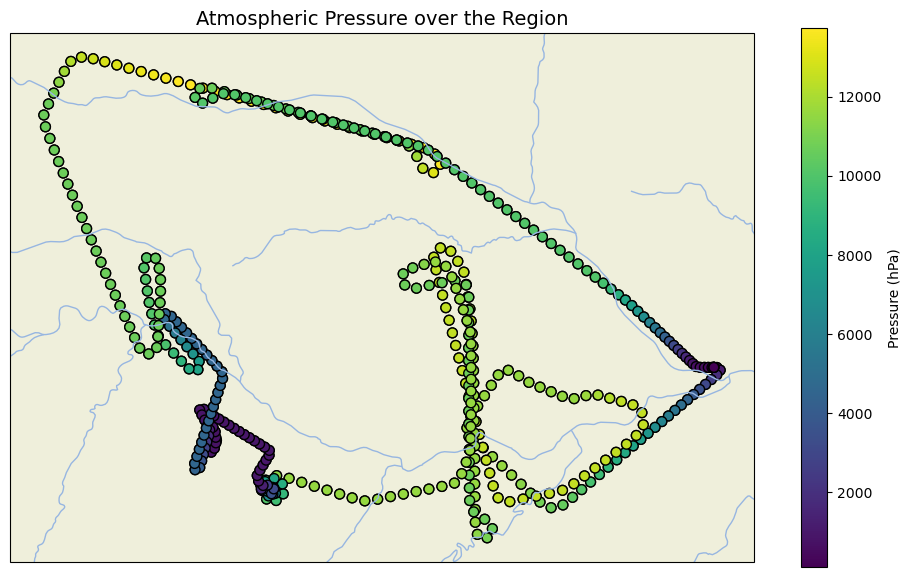

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with Cartopy projection
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Mercator())

# Add map features
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

# Plot the scatter points on the map
sc = ax.scatter(
    lons, lats, c=pressure, cmap='viridis', s=50, 
    edgecolor='k', transform=ccrs.PlateCarree(), label='Pressure'
)

# Add a colorbar for the pressure
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Pressure (hPa)')

# Add titles and labels
plt.title("Atmospheric Pressure over the Region", fontsize=14)

# Show the plot
plt.show()


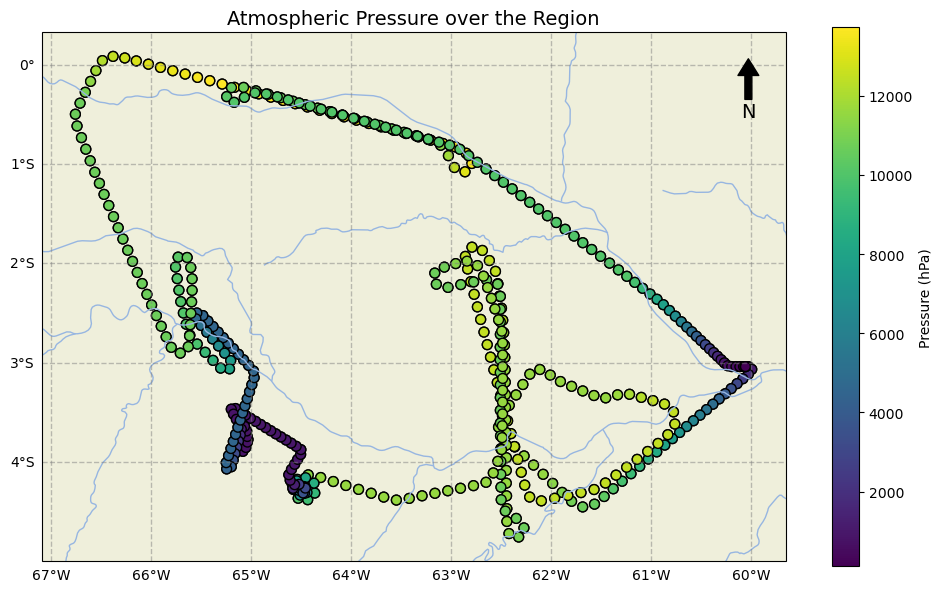

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with Cartopy projection
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Mercator())

# Add map features
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Turn off labels on the top axis
gl.right_labels = False  # Turn off labels on the right axis
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Plot the scatter points on the map
sc = ax.scatter(
    lons, lats, c=pressure, cmap='viridis', s=50, 
    edgecolor='k', transform=ccrs.PlateCarree(), label='Pressure'
)

# Add a colorbar for the pressure
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Pressure (hPa)')

# Add titles and axis labels
plt.title("Atmospheric Pressure over the Region", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Add a cardinal direction (north arrow)
x, y, arrow_length = 0.95, 0.95, 0.1  # Position and length of the arrow
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=14, xycoords='axes fraction')

# Show the plot
plt.show()


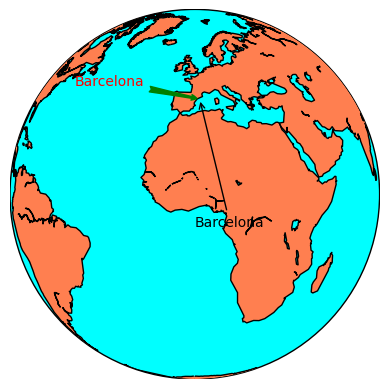

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


map = Basemap(projection='ortho', 
              lat_0=10, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


x, y = map(2, 41)
x2, y2 = (-90, 10)

plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                color='r',
                arrowprops=dict(arrowstyle="fancy", color='g')
                )

x2, y2 = map(0, 0)
plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->")
                )
plt.show()

In [ ]:
import plotly.graph_objects as go

# Load the Excel file
file_path = 'merged_data.xlsx' 
df = pd.read_excel(file_path)

# Create dummy data for latitude, longitude, and pressure over Amazon Rainforest
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude values for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude values for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure values (hPa)

# Create a scatter plot with atmospheric pressure as color
fig = go.Figure(
    go.Scattergeo(
    lon=lons,
    lat=lats,
    mode='markers',
    marker=dict(
        size=10,
        color=pressure,
        colorscale='Viridis',
        colorbar=dict(title="Pressure (hPa)"),
        showscale=True
    ),
    hoverinfo='text',
    text=[f"Lat: {lat:.2f}, Lon: {lon:.2f}, Pressure: {p:.2f} hPa" 
        for lat, lon, p in zip(lats, lons, pressure)]
))

# Add layout features for better view over the Amazon
fig.update_geos(projection_type="mercator", 
                lataxis_range=[-3.5, -1.0], 
                lonaxis_range=[-60, -55])
fig.update_layout(title="Atmospheric Pressure over Amazon Rainforest")

# Variables to store clicked points
clicked_points = []

# Callback function for click events
def handle_click(trace, points, state):
    global clicked_points
    if len(points.point_inds) > 0:
        clicked_lat = trace.lat[points.point_inds[0]]
        clicked_lon = trace.lon[points.point_inds[0]]
        clicked_points.append((clicked_lat, clicked_lon))

        if len(clicked_points) == 2:
            # Calculate the distance between two points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers

            # Add a line connecting the two points
            fig.add_trace(go.Scattergeo(
                lon=[clicked_points[0][1], clicked_points[1][1]],
                lat=[clicked_points[0][0], clicked_points[1][0]],
                mode='lines+markers',
                line=dict(color='red', width=2),
                marker=dict(size=10),
                hoverinfo='none',
            ))

            # Add an annotation for the distance
            mid_lat = (clicked_points[0][0] + clicked_points[1][0]) / 2
            mid_lon = (clicked_points[0][1] + clicked_points[1][1]) / 2
            fig.add_annotation(
                x=mid_lon, y=mid_lat, text=f"Distance: {distance:.2f} km",
                showarrow=False, font=dict(color="red", size=12)
            )

            # Reset clicked points
            clicked_points = []

    fig.show()

# Attach the callback to the figure
fig.data[0].on_click(handle_click)

# Show the plot
fig.show()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from geopy.distance import geodesic

# Create a Tkinter window
root = tk.Tk()
root.title("Atmospheric Pressure over Amazon Rainforest")

# Generate random data for lat, long, and pressure
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure (hPa)

# Create a figure and axis using Matplotlib
fig, ax = plt.subplots()
scatter = ax.scatter(lons, lats, c=pressure, cmap='viridis')
ax.set_title('Atmospheric Pressure over Amazon Rainforest')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar for the pressure
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Pressure (hPa)')

# Store clicked points to calculate distance
clicked_points = []

# Click event handler
def on_click(event):
    if event.inaxes == ax:
        clicked_lat = event.ydata
        clicked_lon = event.xdata
        clicked_points.append((clicked_lat, clicked_lon))
        
        if len(clicked_points) == 2:
            # Calculate the distance between two points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers
            
            # Connect the two points with a line
            ax.plot([clicked_points[0][1], clicked_points[1][1]], 
                    [clicked_points[0][0], clicked_points[1][0]], 
                    color='red', linewidth=2)
            
            # Show the distance in a popup
            messagebox.showinfo("Distance", f"Distance: {distance:.2f} km")
            
            # Clear the points for the next selection
            clicked_points.clear()
            
        # Redraw the figure
        fig.canvas.draw()

# Bind the click event to the plot
fig.canvas.mpl_connect('button_press_event', on_click)

# Integrate Matplotlib figure into the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Start the Tkinter event loop
root.mainloop()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.distance import geodesic
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Create a Tkinter window
root = tk.Tk()
root.title("Atmospheric Pressure over Amazon Rainforest")

# Generate random data for lat, lon, and pressure
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure (hPa)

# Create a Cartopy figure and axis with a Mercator projection
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-70, -50, -10, 5])  # Define extent over the Amazon region

# Add coastlines, borders, and other map-related features
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Plot pressure data points
sc = ax.scatter(lons, lats, c=pressure, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.05)
cbar.set_label('Pressure (hPa)')

# Store clicked points for distance calculation
clicked_points = []

# Event handler for clicking on the plot
def on_click(event):
    if event.inaxes == ax:
        # Get clicked coordinates (latitude and longitude)
        clicked_lat = event.ydata
        clicked_lon = event.xdata
        clicked_points.append((clicked_lat, clicked_lon))
        
        if len(clicked_points) == 2:
            # Calculate the geodesic distance between two clicked points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers
            
            # Connect the two points with a line
            ax.plot([clicked_points[0][1], clicked_points[1][1]], 
                    [clicked_points[0][0], clicked_points[1][0]], 
                    color='red', linewidth=2, transform=ccrs.PlateCarree())
            
            # Show the distance in a Tkinter popup
            messagebox.showinfo("Distance", f"Distance: {distance:.2f} km")
            
            # Clear clicked points for the next calculation
            clicked_points.clear()
        
        # Redraw the figure
        fig.canvas.draw()

# Bind the click event to the Cartopy plot
fig.canvas.mpl_connect('button_press_event', on_click)

# Embed the Matplotlib figure into the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Start Tkinter event loop
root.mainloop()